# 인공지능과 기계학습 4주차 과제
IT공학전공 2012375 김단

## 1. 데이터 불러오기 및 탐색

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# 데이터 불러오기
df = pd.read_csv("/Users/dankim/AIML/student.csv")
df

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
...,...,...,...,...,...,...,...,...,...,...
703,S492,Male,14,84.658761,78,PhD,Yes,No,50,Fail
704,S301,Male,35,60.278990,83,Masters,No,No,62,Pass
705,S473,Male,25,98.384969,75,Bachelors,Yes,No,57,Fail
706,S307,Female,21,96.148012,84,Bachelors,Yes,No,65,Pass


In [3]:
# 불필요한 특징 제거
df.drop(columns=["Student_ID", "Final_Exam_Score"], inplace=True)

# 데이터 구조 확인
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      708 non-null    object 
 1   Study_Hours_per_Week        708 non-null    int64  
 2   Attendance_Rate             708 non-null    float64
 3   Past_Exam_Scores            708 non-null    int64  
 4   Parental_Education_Level    708 non-null    object 
 5   Internet_Access_at_Home     708 non-null    object 
 6   Extracurricular_Activities  708 non-null    object 
 7   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 44.4+ KB


,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Pass_Fail
0,Male,31,68.267841,86,High School,Yes,Yes,Pass
1,Male,16,78.222927,73,PhD,No,No,Fail
2,Female,21,87.525096,74,PhD,Yes,No,Fail
3,Female,27,92.076483,99,Bachelors,No,No,Pass
4,Female,37,98.655517,63,Masters,No,Yes,Pass


## 2. 데이터 준비

In [4]:
# 타겟값 변환
df["Pass_Fail"] = df["Pass_Fail"].map({"Pass": 1, "Fail": 0})

# 피처 구분
numeric_features = ["Study_Hours_per_Week", "Attendance_Rate", "Past_Exam_Scores"]
categorical_features = ["Gender", "Parental_Education_Level", "Internet_Access_at_Home", "Extracurricular_Activities"]

# X, y 분리
X = df[numeric_features + categorical_features]
y = df["Pass_Fail"]

## 3. 데이터 분할

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4-5. 전처리 파이프라인 구성

In [6]:
# 수치형 변수는 표준화 (평균 0, 표준편차 1)
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# 범주형 변수는 원-핫 인코딩 처리
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer를 사용해 수치형과 범주형 전처리를 통합
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

## 6. 전처리 + 모델 통합 파이프라인 구성

In [7]:
# 전처리 파이프라인과 로지스틱 회귀 기반 SGDClassifier를 결합

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(loss='log_loss', max_iter=1000, random_state=42))
])

## 7. 교차 검증

In [8]:
# 3-Fold 교차검증 정확도 측정
cv_scores = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

# 결과 출력
print("Fold별 정확도:", cv_scores)
print("평균 정확도:", cv_scores.mean())

Fold별 정확도: [0.77777778 0.77248677 0.79255319]
평균 정확도: 0.7809392472513039


## 8. 모델 학습 및 임계값 조정

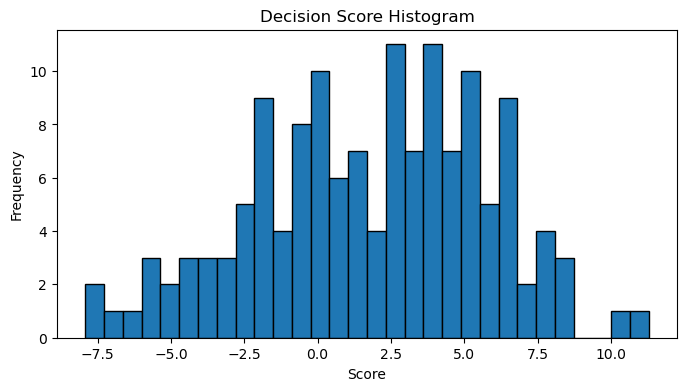

In [9]:
clf.fit(X_train, y_train)
decision_scores = clf.decision_function(X_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

plt.figure(figsize=(8, 4))
plt.hist(decision_scores, bins=30, edgecolor="k")
plt.title("Decision Score Histogram")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

In [10]:
# -0.5 임계값 설정 (정밀도와 재현율의 균형점으로 가정)
custom_threshold = -0.5
y_pred_custom = (decision_scores > custom_threshold).astype(int)

precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
conf_matrix = confusion_matrix(y_test, y_pred_custom)

print("정밀도:", precision)
print("재현율:", recall)
print("F1 점수:", f1)
print("혼동 행렬:\n", conf_matrix) # hitmap으로 변경하기

정밀도: 0.696078431372549
재현율: 1.0
F1 점수: 0.8208092485549133
혼동 행렬:
 [[40 31]
 [ 0 71]]


## 9. 최종 평가

In [11]:
y_pred_default = clf.predict(X_test)
default_acc = accuracy_score(y_test, y_pred_default)
print("기본 predict() 정확도:", default_acc)

# 커스텀 임계값 적용
final_report = classification_report(y_test, y_pred_custom, target_names=["Fail", "Pass"]) # precision, recall, f1 score은 기본적으로 positive 기반 / 그걸 반대로 뒤집어야 negative 중심
print("임계값 적용 classification report:\n", final_report) # 모델을 튜닝하는 것이 아닌, 우리 입맛에 맞게 최종 결과를 조금 바꾼 것

기본 predict() 정확도: 0.8309859154929577
임계값 적용 classification report:
               precision    recall  f1-score   support

        Fail       1.00      0.56      0.72        71
        Pass       0.70      1.00      0.82        71

    accuracy                           0.78       142
   macro avg       0.85      0.78      0.77       142
weighted avg       0.85      0.78      0.77       142

